In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt

In [2]:
def make_models(tickerSymbol):
 

    # Get data on the ticker
    tickerData = yf.Ticker(tickerSymbol)

    # Get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start='2015-01-01', end='2023-04-28')

    # Calculate the EMA with a window of 20 days
    ema = tickerDf['Close'].ewm(span=20, adjust=False).mean()

    # Merge the EMA with the original DataFrame
    tickerDf = pd.concat([tickerDf, ema.rename('EMA')], axis=1)

    # Define the feature and target variables
    data = tickerDf[['Close', 'EMA']]
    target = tickerDf['Close']

    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)


    # Define the number of time steps for the LSTM model
    n_steps = 1000

    # Create a function to split the data into input/output samples
    def prepare_data(data, n_steps):
        X, y = [], []
        for i in range(len(data)):
            end_ix = i + n_steps
            if end_ix > len(data)-1:
                break
            seq_x, seq_y = data[i:end_ix, :], data[end_ix, 0]
            X.append(seq_x)
            y.append(seq_y)
        return np.array(X), np.array(y)

    # Prepare the data for the LSTM model
    X, y = prepare_data(data_scaled, n_steps)

    # Split the data into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 2)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit the model to the training data
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the testing data
    mse = model.evaluate(X_test, y_test, verbose=0)
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{tickerSymbol} model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.savefig(f'{tickerSymbol}_model_accuracy.png')
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{tickerSymbol} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.savefig(f'{tickerSymbol}_model_loss.png')
    print('Mean Squared Error:', mse)

    # Save the trained model to a file
    model.save(f'models1000\\{tickerSymbol.upper()}_model.h5')

In [3]:
# tickers = ["AZN","RHHBY","NVS","BAYRY","SNY","PFE"]
tickers = ['AAPL']
for ticker in tickers:
    make_models(ticker)

dict_keys(['loss'])


KeyError: 'accuracy'

In [4]:
tickers = ['AAPL']    
# Get data on the ticker
tickerData = yf.Ticker(tickers[0])

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-01-01', end='2023-04-28')

# Calculate the EMA with a window of 20 days
ema = tickerDf['Close'].ewm(span=20, adjust=False).mean()

# Merge the EMA with the original DataFrame
tickerDf = pd.concat([tickerDf, ema.rename('EMA')], axis=1)

# Define the feature and target variables
data = tickerDf[['Close', 'EMA']]
target = tickerDf['Close']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)


# Define the number of time steps for the LSTM model
n_steps = 1000

# Create a function to split the data into input/output samples
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Prepare the data for the LSTM model
X, y = prepare_data(data_scaled, n_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 2)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the testing data
mse = model.evaluate(X_test, y_test, verbose=0)

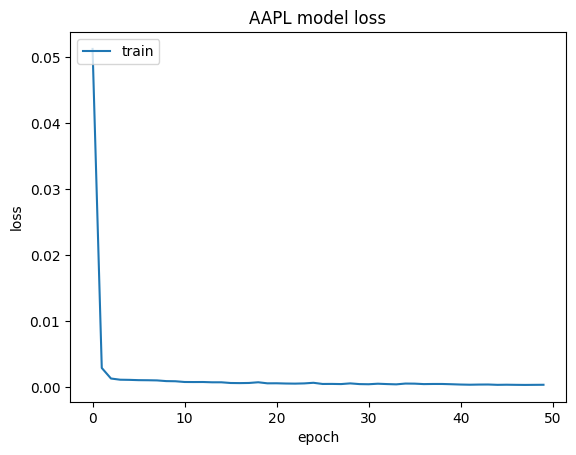

Mean Squared Error: 0.0005902732955291867


<Figure size 640x480 with 0 Axes>

In [8]:
plt.plot(history.history['loss'])
plt
plt.title(f'{tickers[0]} model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig(f'{tickers[0]}_model_loss.png')
print('Mean Squared Error:', mse)

In [11]:
print(history.history)
print(mse)

{'loss': [0.05120593681931496, 0.002939970465376973, 0.0013426064979285002, 0.0011616087285801768, 0.0011390222935006022, 0.0010948197450488806, 0.00108234491199255, 0.001057006069459021, 0.0009511772077530622, 0.0009285543346777558, 0.0008167937048710883, 0.0008083822904154658, 0.0008141559665091336, 0.0007709315977990627, 0.0007708353805355728, 0.000664671475533396, 0.0006484041805379093, 0.0006685735424980521, 0.0007755256956443191, 0.0006148569518700242, 0.0006217424524948001, 0.000586166512221098, 0.0005702672642655671, 0.0006037210114300251, 0.0006962298648431897, 0.000517893407959491, 0.0005261078476905823, 0.0005017903749831021, 0.0006059472798369825, 0.0004988665459677577, 0.000476538814837113, 0.0005556842079386115, 0.0005010704626329243, 0.00046049582306295633, 0.0005793881136924028, 0.0005657313158735633, 0.0004987205029465258, 0.000517406384460628, 0.0005164990434423089, 0.00047797997831366956, 0.0004312638775445521, 0.00040374507079832256, 0.00042803375981748104, 0.000436